In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,Imputer,normalize
from sklearn.metrics import accuracy_score
features=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','heartdisease']
cdata=pd.read_csv('cleveland.csv',names=features)
hdata=pd.read_csv('hungary.csv',names=features)
sdata=pd.read_csv('switzerland.csv',names=features)
sdata

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
5,38,0,4,110,0,0,0,156,0,0,2,?,3,1
6,38,1,3,100,0,?,0,179,0,-1.1,1,?,?,0
7,38,1,3,115,0,0,0,128,1,0,2,?,7,1
8,38,1,4,135,0,?,0,150,0,0,?,?,3,2
9,38,1,4,150,0,?,0,120,1,?,?,?,3,1


In [53]:
datatemp=[cdata,hdata,sdata]
data=pd.concat(datatemp)
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56.0,1.0,2.0,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62.0,0.0,4.0,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57.0,0.0,4.0,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63.0,1.0,4.0,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53.0,1.0,4.0,140,203,1,2,155,1,3.1,3,0.0,7.0,1


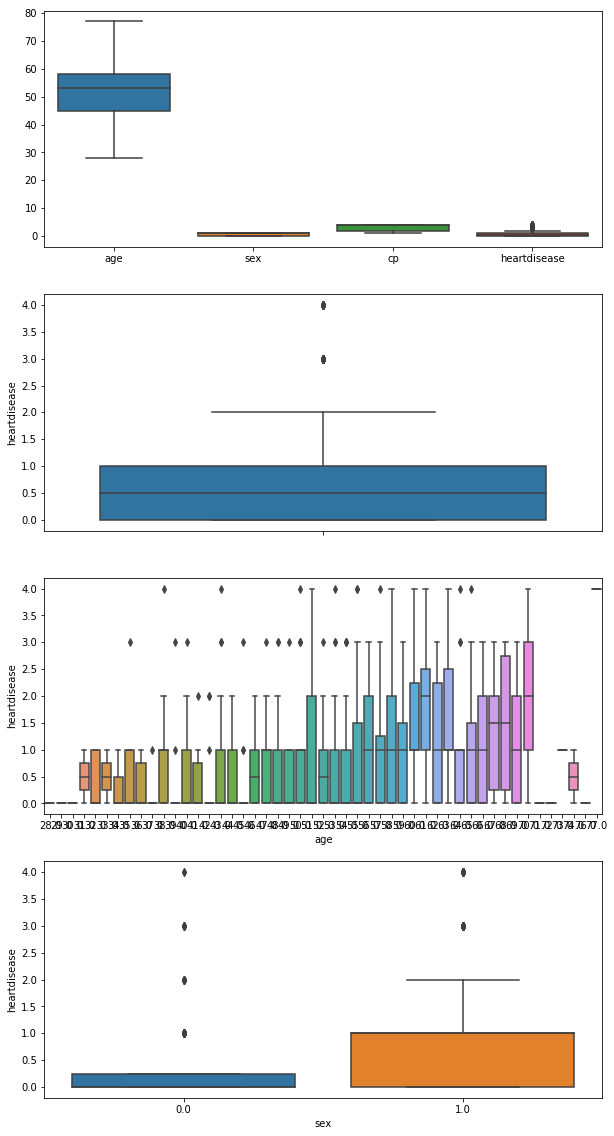

In [9]:
fig,axes=plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10,20)
sn.boxplot(data=data,orient='v',ax=axes[0])
sn.boxplot(data=data,y='heartdisease',orient='v',ax=axes[1])
sn.boxplot(data=data,y='heartdisease',x='age',orient='v',ax=axes[2])
sn.boxplot(data=data,y='heartdisease',x='sex',orient='v',ax=axes[3])

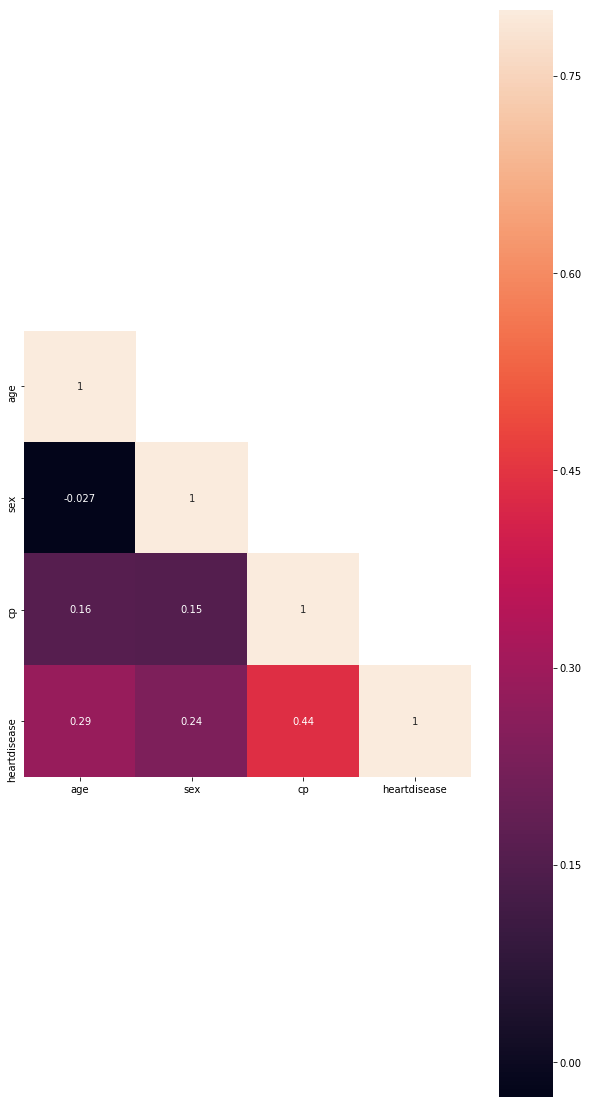

In [17]:
corrMatt =data.corr()
mask=np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(10,20)
sn.heatmap(corrMatt,mask=mask,vmax=.8,square=True,annot=True)

In [54]:
data=data.drop(['ca','slope','thal'],axis=1)
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heartdisease
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,1
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,0
5,56.0,1.0,2.0,120,236,0,0,178,0,0.8,0
6,62.0,0.0,4.0,140,268,0,2,160,0,3.6,3
7,57.0,0.0,4.0,120,354,0,0,163,1,0.6,0
8,63.0,1.0,4.0,130,254,0,2,147,0,1.4,2
9,53.0,1.0,4.0,140,203,1,2,155,1,3.1,1


In [81]:
data=data.replace('?',np.nan)
print(data)

      age  sex   cp trestbps chol  fbs restecg thalach exang oldpeak  \
0    63.0  1.0  1.0      145  233    1       2     150     0     2.3   
1    67.0  1.0  4.0      160  286    0       2     108     1     1.5   
2    67.0  1.0  4.0      120  229    0       2     129     1     2.6   
3    37.0  1.0  3.0      130  250    0       0     187     0     3.5   
4    41.0  0.0  2.0      130  204    0       2     172     0     1.4   
5    56.0  1.0  2.0      120  236    0       0     178     0     0.8   
6    62.0  0.0  4.0      140  268    0       2     160     0     3.6   
7    57.0  0.0  4.0      120  354    0       0     163     1     0.6   
8    63.0  1.0  4.0      130  254    0       2     147     0     1.4   
9    53.0  1.0  4.0      140  203    1       2     155     1     3.1   
10   57.0  1.0  4.0      140  192    0       0     148     0     0.4   
11   56.0  0.0  2.0      140  294    0       2     153     0     1.3   
12   56.0  1.0  3.0      130  256    1       2     142     1    

In [84]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
imputeData=imp.fit_transform(data)

In [91]:
x_train,x_test,y_train,y_test=train_test_split(imputeData[:,:-1],imputeData[:,-1],test_size=0.25,random_state=0)


In [95]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [99]:
classifier=svm.SVC(kernel='rbf')
classifier.fit(x_train,y_train)
preds=classifier.predict(x_test)
accuracy_score(y_test,preds)



0.6111111111111112